# Machine Learning: Algorithms and Applications

# 1.  What is linear regression?
Let's get down to brass tacks and flush out specific details about how regression - or the task of predicting a continuous (or near-continuous) value - is modeled and implemented in practice. We will first discuss linear regression, or the fitting of a line / hyperpalne to data, and then discuss the fitting of nonlinear curves / surfaces.

## The setup
First lets say we have $P$ input / output data points of the form

\begin{equation}
\left(x_{1},\,y_{1}\right),\,\left(x_{2},y_{2}\right),...,\left(x_{P},y_{P}\right)
\end{equation}


where here the $p^{th}$ input\emph{ }is $x_{p}$ and corresponding
output is $y_{p}$. Here both the input feature and output are scalar-valued
(that is one value in, one value out), and the above can be written
more compactly just as $\left\{ \left(x_{p},y_{p}\right)\right\} _{p=1}^{P}$.   We will deal with the instance where we have multidimensional input in just a moment.  

In this class we will write the equation of a line as 

\begin{equation}
b+xw=y
\end{equation}


where $x$ and $y$ are the input and output variables respectively
(given along the horizontal axis and vertical axes in the figure below),
$w$ is the slope (rise over run) of the line, and $b$ is its 'y-intercept'
which we will often refer to as the 'bias'. We will often refer to
$b$ and $w$ collectively as 'weights' or 'parameters' (this image is taken from [1]).

<img src="files/files/line_hyperplane.png" width=600 height=600/>

Now given this notation we can translate our desire to determine a
\emph{linear} relationship between our input features and output mathematically
as the desire to learn proper weights $b$ and $w$ so that

\begin{equation}
b+x_{p}w=y_{p}
\end{equation}


for all points $p=1,...,P.$ In other words, we want to find the slope
and intercept of a line that contains all of our data. However in
most instances this is too restrictive of a demand, as it is unlikely
that our data all lies on a single line (like the toy data shown in
Figure \ref{fig: line-hyperplane}). But all is not lost - we just
need to loosen our goal and seek out the weights of a line on which
the data \emph{approximately} lies or, in other words, an approximate
linear relationship between the input and output for all $p$. Stated
algebraically this is

\begin{equation}
b+x_{p}w\approx y_{p}.
\end{equation}

Lets take a moment and make sure you're following so far. Our aim
is to determine the weights $b$ and $w$ of a line $b+xw=y$ that
approximately represents our given dataset. Now if our dataset is
not related linearly this goal will clearly be inadequate, but lets
assume for the time being that it is to see how we can tune these
parameters correctly.


## 1.2  The linear regression model with multiple inputs

What if we have multiple inputs we need to use to predict our output?
For example, in a financial application we may want to predict the
future price of some financial product based on its past values, the
values of related commodities, national economic indicators, etc.,
How do we formulate the linear regression model? 

First lets say we still have $P$ input / output pairs, but now each
input point has $N$ dimensions (one for each type of input to our
problem). So instead of using a scalar $x_{p}$ to indicate the $p^{th}$
point we use the bold $\mathbf{x}_{p}$, where this is now an $N$
dimensional vector taking the form
\begin{equation}
\mathbf{x}_{p}=\left[\begin{array}{c}
x_{1,p}\\
x_{2,p}\\
\vdots\\
x_{N,p}
\end{array}\right].
\end{equation}


To learn a perfect linear relationship between our outputs and inputs
we then aim to tune a set of $N+1$ parameters so that the weighted
linear combination 

\begin{equation}
b+\underset{n=1}{\overset{N}{\sum}}x_{n,p}w_{n}=y_{p}
\end{equation}


holds for all $p$. For each $p$ we can write this more compactly
by using inner product notation and denoting by $\mathbf{w}=\left[\begin{array}{c}
w_{1}\\
w_{2}\\
\vdots\\
w_{N}
\end{array}\right]$, 

since 

\begin{equation}
\mathbf{x}_{p}^{T}\mathbf{w}=\underset{n=1}{\overset{N}{\sum}}x_{n,p}w_{n},
\end{equation}



as


\begin{equation}
b+\mathbf{x}_{p}^{T}\mathbf{w}=y_{p}.
\end{equation}


Notice how this is completely analogous to equation (\ref{eq:low-dim-perfect-linear-relationships}) and reduces to it when we have only one type of input to the problem, or i.e., when $N=1$. That is, the equation $b+\mathbf{x}_{p}^{T}\mathbf{w}=y_{p}$ is the same as $b+x_{p}w=y_{p}$ when $N=1$.

As with the low dimensional case, we can't expect our data to be \emph{perfectly} linearly related. This almost never happens. So lets loosen this and go for learning weights so that we \emph{almost} have a linear relationship between our input and output. That is

\begin{equation}
b+\mathbf{x}_{p}^{T}\mathbf{w}\approx y_{p}
\end{equation}


for all $p$. Notice, once again, how this is precisely the generalization
of the low dimensional version first in equation (\ref{eq:approximate linear relationship scalar version}). In other words, the desire that $b+\mathbf{x}_{p}^{T}\mathbf{w}\approx y_{p}$ is precisely $b+x_{p}w\approx y_{p}$ when $N=1$. 


##  1.3 Forming the least squares cost function
How can we tune the weights properly so that ([eq:approximate-linear-equation-vector-input]) holds as well as possible? First observe that if the weights are tuned so that this relationship does indeed hold then for each p, then equivalently the squared error between the line evaluated at an input $b+\mathbf{x}_{p}^{T}\mathbf{w}$ and its corresponding output $y_{p}$, or in other words the quantity $\left(b+\mathbf{x}_{p}^{T}\mathbf{w}-y_{p}\right)^{2}$, should be reasonably small. This error is illustrated as the dashed line between each point (here $N=1$) and the representative line, shown in magenta (this image is taken from [1]). 

<img src="files/files/squared-error.png" width=300 height=300/>


Clearly this value needs to be small and, moreover, we want the sum
of this error over the entire dataset to be small as well i.e., the
value

\begin{equation}
g\left(b,\mathbf{w}\right)^{}=\underset{p=1}{\overset{P}{\sum}}\left(b^{}+\mathbf{x}_{p}^{T}\mathbf{w}^{}-y_{p}^{}\right)^{2}.
\end{equation}


Here we have used the function notation $g\left(b,\mathbf{w}\right)$
to indicate that the value of the quantity is completely dependent
on our choice of weights $b$ and $\mathbf{w}$ - the better we tune
these values, the smaller the corresponding \emph{cost function} $g\left(b,\mathbf{w}\right)$ should be\footnote{More specifically, this cost function is typically referred to as the \emph{Least Squares} cost since it measures the squared error between the linear model at each input and its corresponding output.}. In other words, we want to determine weights which \emph{minimize} this quantity. This desire is stated more formally as

\begin{equation}
\underset{b,\mathbf{w}}{\mbox{minimize}} \underset{p=1}{\overset{P}{\sum}}\left(b^{}+\mathbf{x}_{p}^{T}\mathbf{w}^{}-y_{p}^{}\right)^{2}.
\end{equation}


Fine. But so far it does not look like we have accomplished much of
anything, other than stating the relationship in (\ref{eq:approximate linear relationship scalar version}) in a slightly different way. However this manner of expressing (\ref{eq:approximate linear relationship scalar version}) is actually much more useful, as there are practical tools that we can use to solve such a problem or, in other words, \emph{minimize}
such a cost function numerically (i.e., on a computer) and so determine
proper values for the parameters. These tools are based entirely on
fundamental concepts from calculus and are typically referred to as
*mathematical* or *nonlinear optimization*.


##  1.4  Solving the Least Squares problem

Now that we recall the first order condition from calculus, lets see if we can apply it in the case of the Least Squares cost function.  To perform calculations it will first be convenient to use the following more compact notation

\begin{equation}
\begin{array}{cc}
\mathbf{\tilde{x}}_{p}=\left[\begin{array}{c}
1\\
\mathbf{x}_{p}
\end{array}\right] & \,\,\,\,\,\mathbf{\tilde{w}}=\left[\begin{array}{c}
b\\
\mathbf{w}
\end{array}\right]\end{array}.
\end{equation}

With this notation we can rewrite the Least Squares cost function shown in in terms of the single vector $\mathbf{\tilde{w}}$ of parameters as

\begin{equation}
g^{}\left(\mathbf{\tilde{w}}\right)^{}=\underset{p=1}{\overset{P}{\sum}}\left(\mathbf{\tilde{x}}_{p}^{T}\mathbf{\tilde{w}^{}}-y_{p}^{\,}\right)^{2}.
\end{equation}

This is useful because now we can clearly see - by simply rewriting the cost function - that it is in fact a simple quadratic function!  We saw in the first week of the course that there is a closed form solution to the first order condition for such functions.  

since by 'completing the square' we have $\left(\tilde{\mathbf{x}}_{p}^{T}\tilde{\mathbf{w}}-y_{p}\right)^{2}=\left(\tilde{\mathbf{x}}_{p}^{T}\tilde{\mathbf{w}}\right)^{2}-2\tilde{\mathbf{x}}_{p}^{T}\tilde{\mathbf{w}}+y_{p}^{2}$
and since $\tilde{\mathbf{x}}_{p}^{T}\tilde{\mathbf{w}}=\tilde{\mathbf{w}}^{T}\tilde{\mathbf{x}}_{p}$
the term $\left(\tilde{\mathbf{x}}_{p}^{T}\tilde{\mathbf{w}}\right)^{2}=\left(\tilde{\mathbf{x}}_{p}^{T}\tilde{\mathbf{w}}\right)\left(\tilde{\mathbf{x}}_{p}^{T}\tilde{\mathbf{w}}\right)=\left(\tilde{\mathbf{w}}^{T}\tilde{\mathbf{x}}_{p}\right)\left(\tilde{\mathbf{x}}_{p}^{T}\tilde{\mathbf{w}}\right)=\tilde{\mathbf{w}}^{T}\tilde{\mathbf{x}}_{p}\tilde{\mathbf{x}}_{p}^{T}\tilde{\mathbf{w}}$.
So all together we can write that $\underset{p=1}{\overset{P}{\sum}}\left(\tilde{\mathbf{x}}_{p}^{T}\tilde{\mathbf{w}}-y_{p}\right)^{2}$ is equal too

\begin{equation}
\underset{p=1}{\overset{P}{\sum}}\left(\tilde{\mathbf{w}}^{T}\tilde{\mathbf{x}}_{p}\tilde{\mathbf{x}}_{p}^{T}\tilde{\mathbf{w}}-2\tilde{\mathbf{x}}_{p}^{T}\tilde{\mathbf{w}}+y_{p}^{2}\right)=\tilde{\mathbf{w}}^{T}\left(\underset{p=1}{\overset{P}{\sum}}\tilde{\mathbf{x}}_{p}\tilde{\mathbf{x}}_{p}^{T}\right)\tilde{\mathbf{w}}-2\left(\underset{p=1}{\overset{P}{\sum}}\tilde{\mathbf{x}}_{p}^{T}\right)\tilde{\mathbf{w}}+\underset{p=1}{\overset{P}{\sum}}y_{p}^{2}
\end{equation}


Looking closely at the formula above - we can see that it is a quadratic form $g\left(\tilde{\mathbf{w}}\right)=\frac{1}{2}\tilde{\mathbf{w}}^{T}\mathbf{Q}\tilde{\mathbf{w}}+\mathbf{r}^{T}\tilde{\mathbf{s}}+c$
where $\mathbf{Q}=2\underset{p=1}{\overset{P}{\sum}}\tilde{\mathbf{x}}_{p}^{\,}\tilde{\mathbf{x}}_{p}^{T}$,
$\mathbf{r}=2\underset{p=1}{\overset{P}{\sum}}\tilde{\mathbf{x}}_{p}$
and $s=\underset{p=1}{\overset{P}{\sum}}y_{p}^{2}$. From our review
of the first order condition we then know that any stationary point
of this function must satisfy the linear system $\mathbf{Q}\tilde{\mathbf{w}}=-\mathbf{r}$
or equivalently

\begin{equation}
\left(\underset{p=1}{\overset{P}{\sum}}\tilde{\mathbf{x}}_{p}^{\,}\tilde{\mathbf{x}}_{p}^{T}\right)\tilde{\mathbf{w}}=\underset{p=1}{\overset{P}{\sum}}\tilde{\mathbf{x}}_{p}.
\end{equation}


This can be solved using a variety of approaches. One numerically stable, albeit computationally slow, approach is to take the inverse (or 'pseudo-inverse') of the matrix on the left giving 

\begin{equation}
\mathbf{\tilde{w}^{\star}}=\left(\underset{p=1}{\overset{P}{\sum}}\mathbf{\tilde{x}}_{p}^{\,}\mathbf{\tilde{x}}_{p}^{T}\right)^{-1}\underset{p=1}{\overset{P}{\sum}}\mathbf{\tilde{x}}_{p}y_{p}.
\end{equation}




### Example: putting the formula to work

Now that we have an explicit formula for a minimum of the Least Squares cost function, let's put it to work.  In the following we will use the formula to  

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Now load in the student loan data and create $\bf{x}$ and $\bf{y}$ vectors

In [14]:
my_data = np.genfromtxt('files/student_debt.csv', delimiter=',')
x = my_data[:,0].reshape((len(my_data),1))
y = my_data[:,1].reshape((len(my_data),1))

Lets plot the data just to make sure we're all good


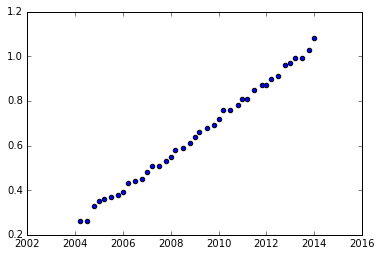

In [10]:
plt.scatter(x,y)

And now we can create the desired matrix

In [19]:
P = len(y)
# start loop to create C and d 
Q = 0
r = 0
for p in range(0,P):
    x_p = np.vstack((1,x[p]))  # stack 1 on top of pth point
    y_p = y[p]
    
    # update Q
    Q+= x_p*x_p.T           # careful - this is an outer product of vectors
    
    # update d
    r-= y_p*x_p

Now that we have $\mathbf{Q}$ and $\mathbf{r}$ figured out - lets solve the linear system $\mathbf{Q}\mathbf{w} = - \mathbf{r}$

In [20]:
w = np.linalg.solve(Q,-r)

Now that this is all done we can plot our predictor on the student data we can plot our linear predictor on top of the dataset

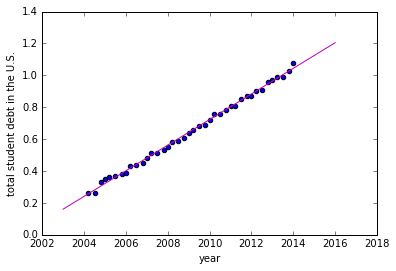

In [21]:
x_in = np.linspace(2003,2016)
y_predicted = w[0] + x_in*w[1]    # our linear model
plt.plot(x_in,y_predicted,'m') 
plt.scatter(x,y)
plt.xlabel('year')
plt.ylabel('total student debt in the U.S.')

## References

[1] Jeremy Watt, Reza Borhani, and Aggelos. Katsaggelos. Machine Learning Refined. Cam- bridge University Press, 2016.